## Axelrod's Tournament

Axelrod's Tournament, proposed by political scientist Robert Axelrod in 1984, is a seminal study in evolutionary game theory. It investigates strategies for cooperation and the emergence of cooperation in repeated interactions, using the iterated prisoner's dilemma as the core game.

### Objective
The objective of Axelrod's Tournament is to explore which strategies are most effective in promoting cooperation and achieving high payoffs in repeated prisoner's dilemma interactions.

### Setup
- **Participants:** Various computer programs representing different strategies.
- **Game:** The iterated prisoner's dilemma, where two players repeatedly choose to cooperate or defect.
- **Scoring:** Participants' strategies are evaluated based on their cumulative payoff across multiple rounds of interactions.

### Key Findings
- **Tit-for-Tat:** The tournament demonstrated the effectiveness of the tit-for-tat strategy, which starts by cooperating and then mirrors the opponent's previous move.
- **Complex Strategies:** While simple strategies performed well, more sophisticated strategies that adapt to opponent behavior also achieved success.
- **Evolution of Cooperation:** Axelrod's Tournament showed that cooperation can emerge and persist in competitive environments through the adoption of reciprocal and forgiving strategies.

### Significance
- Axelrod's Tournament has had a profound impact on the study of cooperation, game theory, and evolutionary dynamics.
- Its findings have applications in biology, economics, political science, and computer science, informing research on cooperation and conflict resolution.

Axelrod's Tournament remains a landmark study, providing insights into the mechanisms underlying cooperation and the strategies that facilitate its emergence in competitive environments.


In [46]:
#%pip install axelrod

In [47]:
import axelrod as axl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
players = [
    axl.Cooperator(),                   # Always Cooperates
    axl.Defector(),                     # Always Defects
    axl.TitForTat(),                    # Cooperates on the first move, then mirros the opponent's last move
    axl.Grudger(),                      # Cooperates until the opponent defects, then always defects
    axl.Random(),                       # Randomly chooses to cooperate or defect
    axl.TitFor2Tats(),                  # Cooperates on the first move, then defects if the opponent defects twice in a row
    axl.ForgivingTitForTat(),           # Starts by cooperating but mirros the opponents moves if opponent has won more than 10% of the time
    axl.Retaliate(),                    # Starts by cooperating but deflects if opponent has won more than 10% of the games
    axl.FirstByJoss(),                  # Tit for Tat but defects 10% of the time regardless of opponent's last move
    axl.Prober(),                       # Plays D, C, C initially. Defects forever if opponent cooperated in moves 2 and 3. Otherwise plays TFT.
    axl.Aggravater(),                   # Grudger, except that it defects on the first 3 turns
]
#players = [s() for s in axl.axelrod_first_strategies]

In [49]:
# Instantiate a Tournament object
tournament = axl.Tournament(players)
results = tournament.play()
eco = axl.Ecosystem(results)
eco.reproduce(1000)

Analysing: 100%|██████████| 25/25 [00:00<00:00, 92.01it/s]


C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_16732\1518715392.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  stackplot.show()


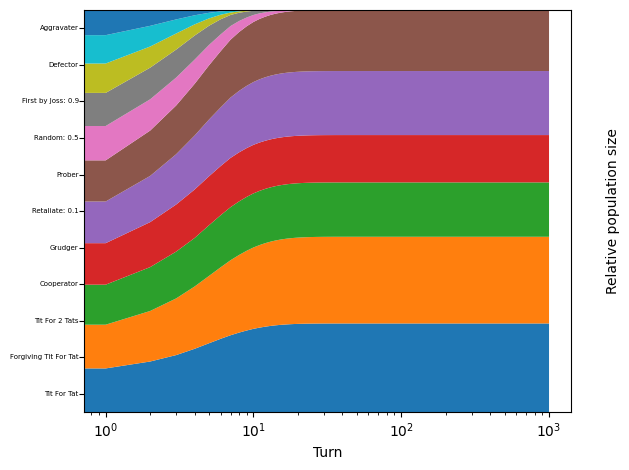

In [50]:
plot = axl.Plot(results)  
stackplot = plot.stackplot(eco)
stackplot.show()

C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_16732\3179139329.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  boxplot.show()


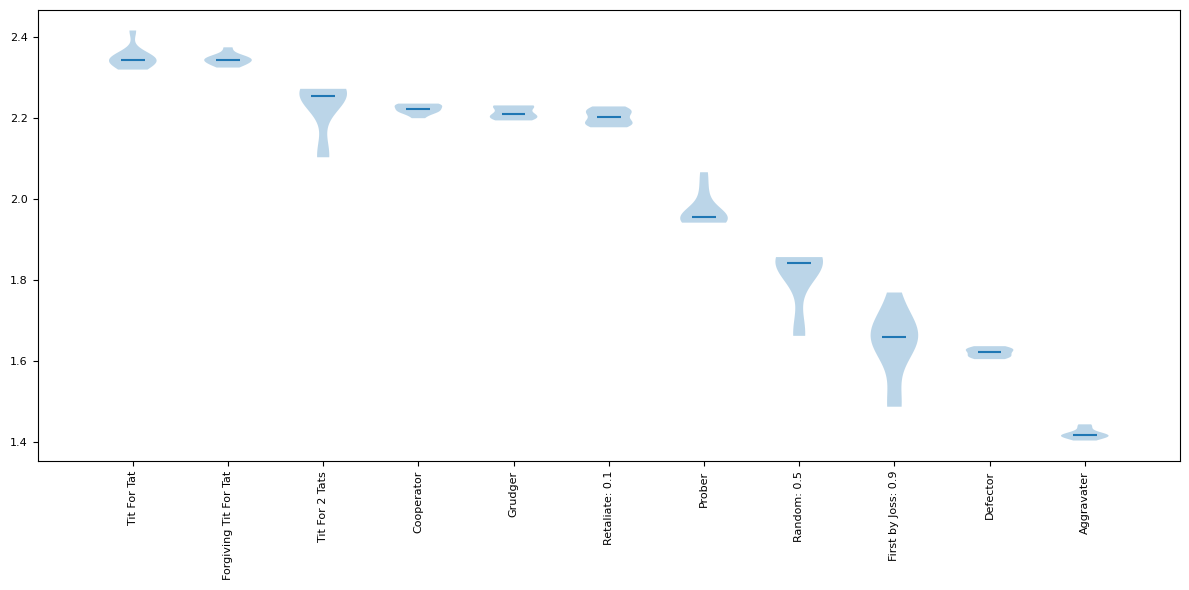

In [51]:
boxplot = plot.boxplot()
boxplot.show()

C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_16732\3244706133.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  payoff_map.show()


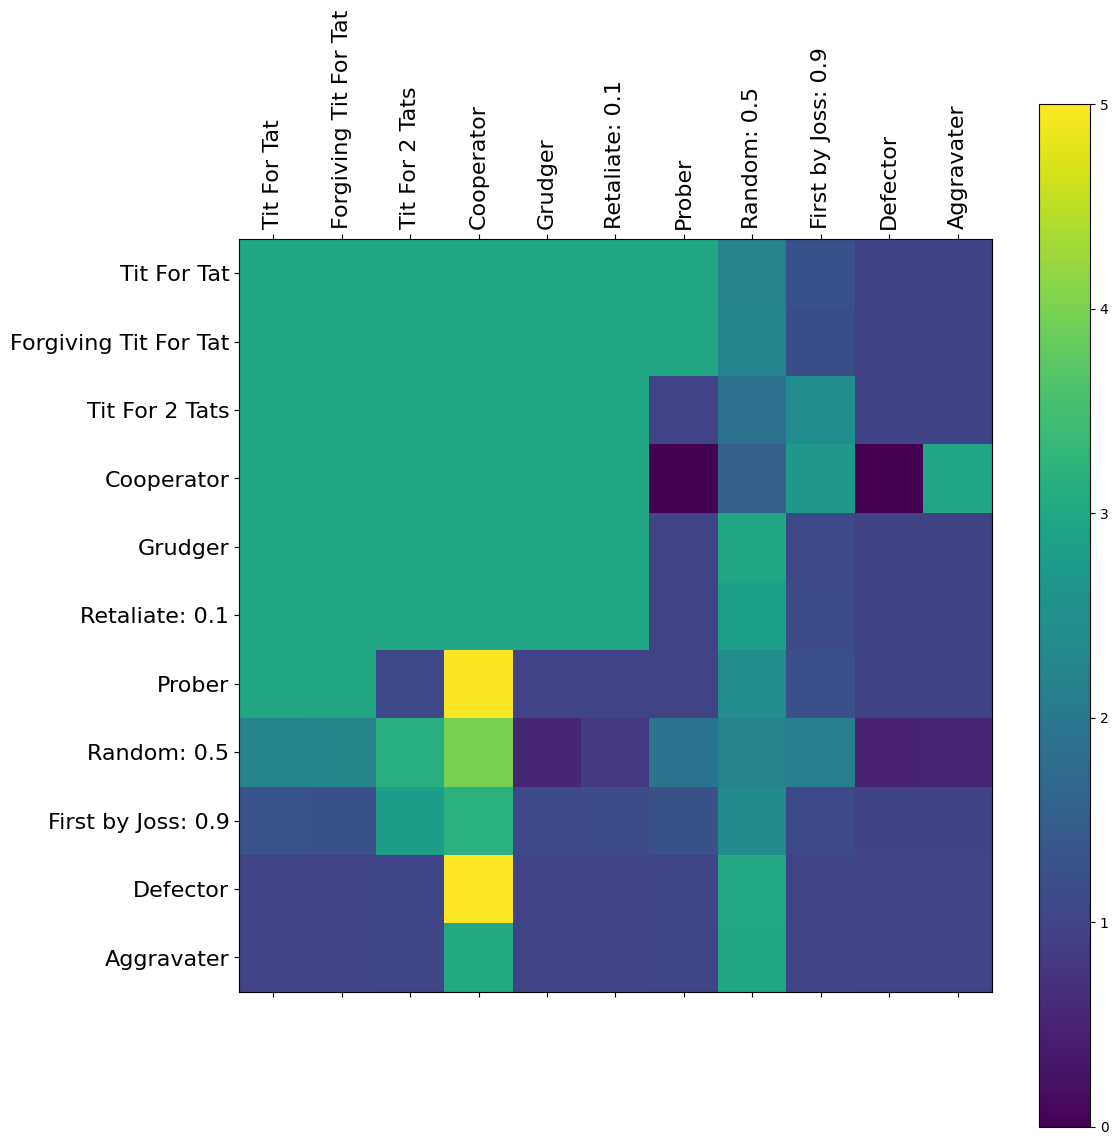

In [52]:
payoff_map = plot.payoff()
payoff_map.show()

In [53]:
summary = results.summarise()
df = pd.DataFrame([player.Name for player in summary], columns=['Player'], index=[player.Rank + 1 for player in summary])
df.columns.name = 'Rank'
#df['Wins'] = [player.Wins for player in summary]
df['Median Score'] = [player.Median_score for player in summary]
#df['Rank'] = [player.Rank + 1 for player in summary]
df['Cooperation Score'] = [player.Cooperation_rating for player in summary]
df['Cooperative'] = [player.Cooperation_rating >= 0.5 for player in summary]
df.head(len(results.ranked_names))

Rank,Player,Median Score,Cooperation Score,Cooperative
1,Tit For Tat,2.34300,0.66030,True
2,Forgiving Tit For Tat,2.34275,0.66085,True
3,Tit For 2 Tats,2.25450,0.66260,True
4,Cooperator,2.22225,1.00000,True
5,Grudger,2.20900,0.50815,True
6,Retaliate: 0.1,2.20200,0.51925,True
7,Prober,1.95400,0.25575,False
8,Random: 0.5,1.84050,0.50455,True
9,First by Joss: 0.9,1.65825,0.25445,False
10,Defector,1.62100,0.00000,False


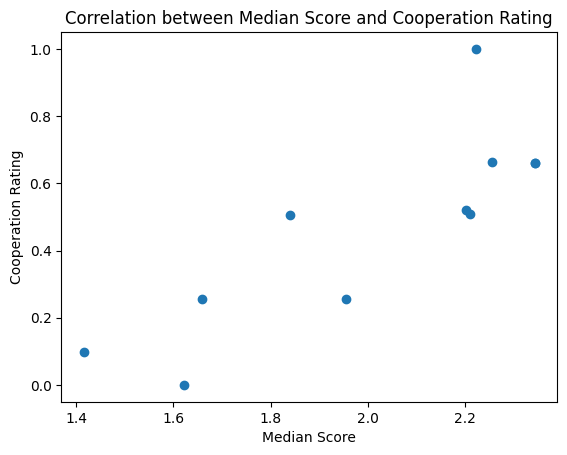

In [54]:
plt.scatter(df['Median Score'], df['Cooperation Score'])
plt.title('Correlation between Median Score and Cooperation Rating')
plt.xlabel('Median Score')
plt.ylabel('Cooperation Rating')
plt.show()

### Conclusion

![Players](./images/players.png)
From the results of the tournament, we can observe that the strategies have their unique advantages and disadvantages. The effectiveness of these strategies can vary depending on the behavior of the opponents they interact with. We can see that cooperative strategies perform better than the non-cooperative ones.

Axelrod concluded for a strategy to be successfull in an evolutionary game it should: 
-   **Be Nice** : Never be first to defect
-   **Retaliate** : Return defection with defection
-   **Be forgiving** : Not hold grudges
-   **Be clear** : Clarity is essential for others to cooperate with you.

Here are the results of Axelrod's 1st tournament :
![Axelrod's 1st Tournament](./images/axelrods_1st_tournament.png)

Our simulation of the tournament:  
![Our simulation](./images/our_simulation.png)

If we add some random noise(10%) to the games, here are the results: 
![Axelrod's 1st Tournament](./images/noise_10.png)